In [1]:
# Importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')
     

In [2]:
df = pd.read_csv('/workspaces/codespaces-jupyter/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.shape

(200, 5)

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

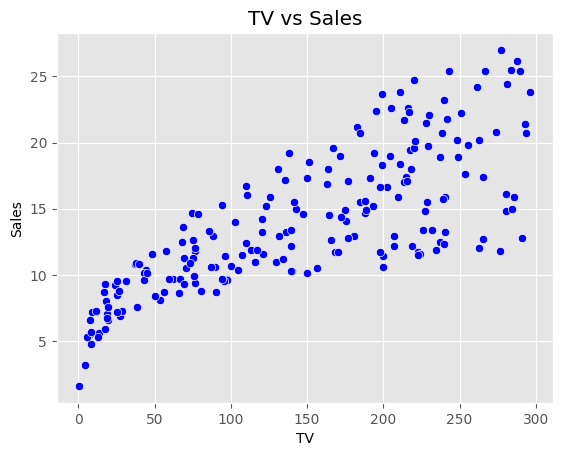

In [13]:
sns.scatterplot(data=df,x='TV',y='Sales',color='blue')
plt.title('TV vs Sales')
plt.show()

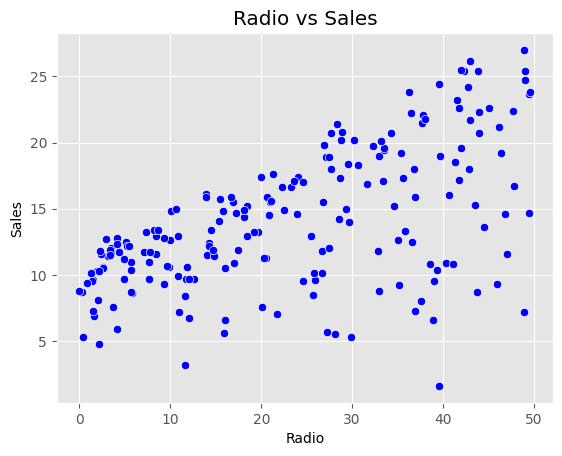

In [14]:
sns.scatterplot(data=df,x='Radio',y='Sales',color='blue')
plt.title('Radio vs Sales')
plt.show()
     

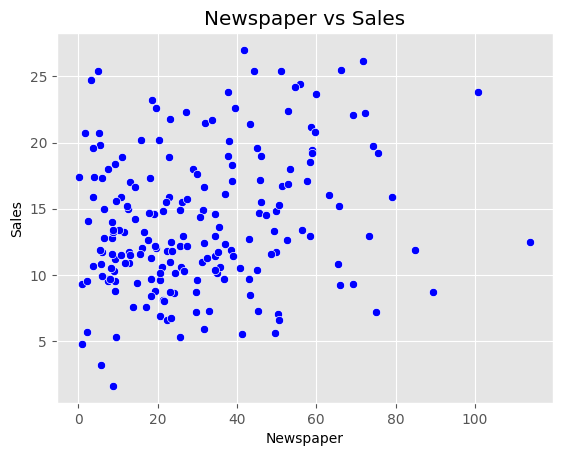

In [15]:
sns.scatterplot(data=df,x='Newspaper',y='Sales',color='blue')
plt.title('Newspaper vs Sales')
plt.show()
     

In [16]:
X = df.iloc[:,:-1]
y = df['Sales']
     

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [19]:
models = {
    'dt' : DecisionTreeRegressor(),
    'lr' : LinearRegression(),
    'random' : RandomForestRegressor()
}

In [20]:
report = {}
for i in range(len(list(models))):
            model = list(models.values())[i]
            print(f"Model Training started with {model}")
            model.fit(X_train,y_train)
            print(f"Training completed successfully")
            y_test_pred = model.predict(X_test)
            print("Calculating score")
            test_model_score = r2_score(y_test, y_test_pred)
            print(f"Calculted score: {round(test_model_score*100,2)}% for {model}")
            print("=="*30)
            report[list(models.keys())[i]] = test_model_score

Model Training started with DecisionTreeRegressor()
Training completed successfully
Calculating score
Calculted score: 93.65% for DecisionTreeRegressor()
Model Training started with LinearRegression()
Training completed successfully
Calculating score
Calculted score: 86.01% for LinearRegression()
Model Training started with RandomForestRegressor()
Training completed successfully
Calculating score
Calculted score: 97.05% for RandomForestRegressor()


In [21]:
random = RandomForestRegressor()

In [22]:
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
     

In [23]:
df.iloc[6].values

array([57.5, 32.8, 23.5, 11.8])

In [24]:
model.predict([[57.5, 32.8, 23.5]])[0]

11.482999999999986